<a href="https://colab.research.google.com/github/samikshagadhave/binary_classification/blob/main/binary_classification_with_VGG16_on_transmission_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
%cd /content/gdrive

/content/gdrive


In [ ]:
import pandas as pd

df=pd.read_excel(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Train 1.xlsx')

df['OR_Gate']=df['Tower']|df['Transmission line']|df['insulator']|df['vibration damper']
#print(df['OR_Gate'])

Bad_dataset=list(df[df['OR_Gate']==0]["Image Name"])
#print(Bad_dataset)

Good_dataset=list(df[df['OR_Gate']==1]["Image Name"])
#print(Good_dataset)
path=r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/train/"

img_path_Bad_dataset=r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Train/bad_dataset/"

img_path_Good_dataset =r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Train/good_dataset/"
import shutil
for i in Bad_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Bad_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path,dest_path)
   #print(temp)
   print("bad_dataset folder created and relevant images have been moved")
for i in Good_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Good_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path, dest_path)
   print("good_dataset folder created and relevant images have been moved")


df=pd.read_excel(r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test 1.xlsx')

df['OR_Gate']=df['Tower']|df['Transmission line']|df['insulator']|df['vibration damper']
#print(df['OR_Gate'])

Bad_dataset=list(df[df['OR_Gate']==0]["Image Name"])
Good_dataset=list(df[df['OR_Gate']==1]["Image Name"])
#print(Good_dataset)
path=r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/test/"

img_path_Bad_dataset=r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/"
img_path_Good_dataset =r"/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/"
import shutil
for i in Bad_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Bad_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path,dest_path)
   #print(temp)
   print("bad_dataset folder created and relevant images have been moved")
for i in Good_dataset:
   src_path=path+i
   #print(src_path)
   dest_path=img_path_Good_dataset+i
   #print(dest_path)
   temp=shutil.copy(src_path, dest_path)
   print("good_dataset folder created and relevant images have been moved")


bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have been moved
bad_dataset folder created and relevant images have bee

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten,Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

train_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(128,128)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory=r'/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(128,128)
)

print(train_ds)
print(validation_ds)


Found 198 files belonging to 2 classes.
Found 86 files belonging to 2 classes.
<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
conv_base=VGG16(input_shape=(128,128,3),include_top=False,weights='imagenet')
conv_base.summary()
for layer in conv_base.layers:
  layer.trainable=False
model=Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1,activation='sigmoid'))
model.add(Dropout(0.2))


58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                              

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
 dropout_1 (Dropout)         (None, 1)                 0         
                                                                 
Total params: 16,812,353
Trainable params: 2,097,665
Non

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Metric
Metric=['accuracy','Precision','Recall']
model.compile(loss='BinaryCrossentropy',optimizer=Adam(learning_rate=0.001),metrics=Metric)

In [ ]:
history=model.fit(train_ds,validation_data=validation_ds,epochs=30)

Epoch 1/30
7/7 [==============================] - 22s 964ms/step - loss: 4.9583 - accuracy: 0.6768 - precision: 0.8086 - recall: 0.7988 - val_loss: 3.9010 - val_accuracy: 0.7442 - val_precision: 0.7442 - val_recall: 1.0000
Epoch 2/30
7/7 [==============================] - 21s 1s/step - loss: 4.7237 - accuracy: 0.6919 - precision: 0.8084 - recall: 0.8232 - val_loss: 3.9010 - val_accuracy: 0.7442 - val_precision: 0.7442 - val_recall: 1.0000
Epoch 3/30
7/7 [==============================] - 22s 1s/step - loss: 5.2699 - accuracy: 0.6566 - precision: 0.8038 - recall: 0.7744 - val_loss: 3.9010 - val_accuracy: 0.7442 - val_precision: 0.7442 - val_recall: 1.0000
Epoch 4/30
7/7 [==============================] - 19s 955ms/step - loss: 4.5741 - accuracy: 0.7020 - precision: 0.8387 - recall: 0.7927 - val_loss: 3.9010 - val_accuracy: 0.7442 - val_precision: 0.7442 - val_recall: 1.0000
Epoch 5/30
7/7 [==============================] - 20s 1s/step - loss: 5.0362 - accuracy: 0.6717 - precision: 0.807

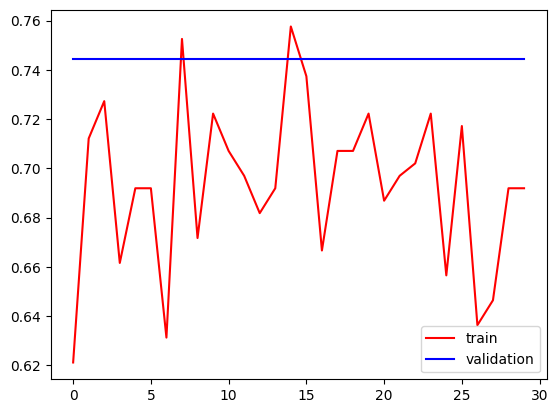

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

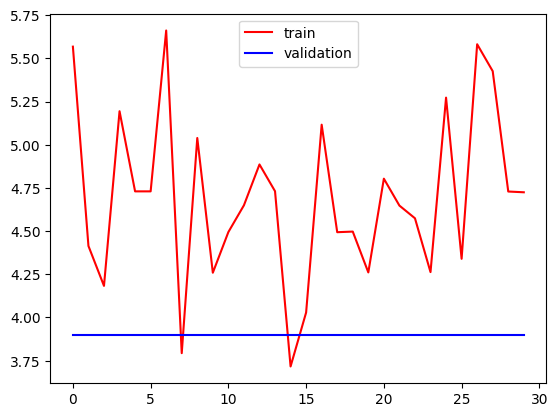

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0066.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 1s 648ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0108.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)


1/1 [==============================] - 0s 20ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0110.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 20ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0489.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 20ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0491.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 20ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0493.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 27ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0495.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 20ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0497.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 19ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0499.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 21ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0501.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 22ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0503.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 21ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0505.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 19ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0507.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 21ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0509.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 67ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0608.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 92ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0610.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 25ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0976.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 21ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0978.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 29ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0980.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 19ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0982.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 21ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0984.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 19ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/bad_dataset/DJI_0986.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 22ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0869.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 28ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0871.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 19ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0873.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 21ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0875.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 24ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0877.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 22ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0879.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 32ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0881.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 28ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0883.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 19ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0885.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 21ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0887.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 30ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0889.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 19ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0891.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 20ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0893.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 21ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0895.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 29ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0897.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 25ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0899.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 20ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0901.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 25ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0903.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 21ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0905.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 21ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0907.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 19ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0909.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0911.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 19ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0913.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 28ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0915.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 21ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0917.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 21ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0919.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 19ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0921.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 29ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0923.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 19ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0925.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 19ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0927.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 27ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0929.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0931.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 22ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0933.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 22ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0935.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 21ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0937.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 22ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0939.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 20ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0941.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 27ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0943.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 19ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0945.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 18ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0947.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 30ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0949.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 20ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0951.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 19ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0953.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 22ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0955.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 19ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0957.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 21ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0959.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 33ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0961.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 19ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0963.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 22ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0965.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 19ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0967.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 23ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0969.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 20ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0971.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 19ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0973.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 22ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0975.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 26ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0977.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 20ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0979.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 21ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0981.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 22ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0983.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 20ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0985.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 22ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0987.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 19ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0989.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 36ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0991.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 19ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0993.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 22ms/step
[[1.]]


In [ ]:
import cv2
image=cv2.imread('/content/gdrive/MyDrive/dataset/T51+T52BAD+T53BAD+T54BAD+T57BAD +T58BAD/Test/good_dataset/DJI_0995.jpg')
image_resized=cv2.resize(image,(128,128))
image=np.expand_dims(image_resized,axis=0)
pred=model.predict(image)
print(pred)

1/1 [==============================] - 0s 20ms/step
[[1.]]


In [ ]:

from sklearn.metrics import classification_report,confusion_matrix
truth=['bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','bad','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good']
prediction=['good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good','good']
print(classification_report(truth,prediction))
print(confusion_matrix(truth,prediction))

              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        22
        good       0.74      1.00      0.85        64

    accuracy                           0.74        86
   macro avg       0.37      0.50      0.43        86
weighted avg       0.55      0.74      0.64        86

[[ 0 22]
 [ 0 64]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


training f1-score=1
validation f1-score=0.90